## Biblioteki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

## Wczytanie danych

In [2]:
all_reviews = []
one_review = {}
data = open('Cell_Phones_&_Accessories.txt')
lines = data.readlines()

for line in lines:
    line = line.split(':')
    if line[0] != '\n':
        one_review[line[0]] = line[1].replace('\n', '')
        if line[0] == 'review/text':
            all_reviews.append(one_review)
            one_review = {}

df = pd.DataFrame(all_reviews, columns=['product/productId', 'product/title', 'product/price', 'review/userId', 'review/profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78930 entries, 0 to 78929
Data columns (total 10 columns):
product/productId     78930 non-null object
product/title         78930 non-null object
product/price         78930 non-null object
review/userId         78930 non-null object
review/profileName    78930 non-null object
review/helpfulness    78930 non-null object
review/score          78930 non-null object
review/time           78930 non-null object
review/summary        78930 non-null object
review/text           78930 non-null object
dtypes: object(10)
memory usage: 6.0+ MB


In [4]:
df['review/score'] = df['review/score'].astype("float64")
df['review/score'] = df['review/score'].astype("int")
df['review/time'] = df['review/time'].astype("int64")

In [5]:
df.describe()["review/score"]

count    78930.000000
mean         3.523337
std          1.524245
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64

In [6]:
df.head(5)

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1,1233360000,Don't buy!,"First of all, the company took my money and s..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4,1186704000,good,works real good....a little hard to set up......
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4,1146182400,No instructions included...,The price was right for this cable ($11.95+$4...
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB c...


Wstępne uwagi: Można zauważyć, że czas jest podany w formacie uniksowym, na pewno trzeba to zamienic na data bardziej czytelną. Ponadto id produktu się powtarza dla kilku recenzji, wiec mozemy okreslic jak wygladaja rozkłady score


In [7]:
times = []
for i in range(0, len(df['review/time'])):
    ts = datetime.utcfromtimestamp(df['review/time'][i]).strftime('%Y-%m-%d %H:%M:%S')#podzial na year, month, hour, minute i second
    times.append(ts)
df['review/date']=times

## Pozytywne vs. negatywne opinie

In [8]:
def opinion(score):
        if score<=2:
            return"Negatywna"
        elif score==3:
            return"Neutralna"
        else: return"Pozytywna"

In [9]:
op=[]
for i in range(0,len(df["review/score"])):
    op.append(opinion(score=df["review/score"][i]))
df['review/opinion']=op
df.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/date,review/opinion
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1,1233360000,Don't buy!,"First of all, the company took my money and s...",2009-01-31 00:00:00,Negatywna
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...,2007-10-04 00:00:00,Pozytywna
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4,1186704000,good,works real good....a little hard to set up......,2007-08-10 00:00:00,Pozytywna
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4,1146182400,No instructions included...,The price was right for this cable ($11.95+$4...,2006-04-28 00:00:00,Pozytywna
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB c...,2007-03-12 00:00:00,Negatywna


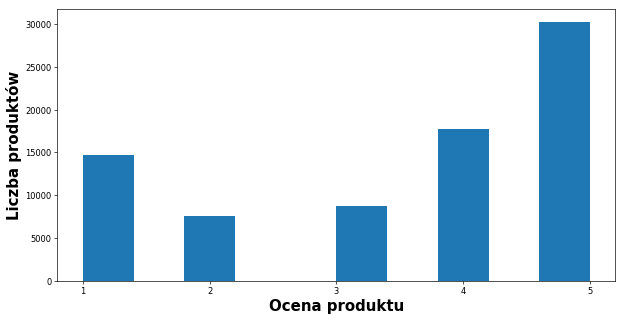

In [10]:
# Można narysować histogram, aby zobaczyc rozklad oceny produktu 
plt.figure(figsize=(12,6),dpi=60)
plt.hist(df['review/score'])
plt.xlabel("Ocena produktu",fontdict={"fontweight":"bold","fontsize":18})
plt.ylabel("Liczba produktów",fontdict={"fontweight":"bold","fontsize":18})
plt.xticks([1,2,3,4,5])
plt.show()

In [11]:
df1=df.groupby("review/opinion").count()
df1

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/date
review/opinion,,,,,,,,,,,
Negatywna,22241,22241,22241,22241,22241,22241,22241,22241,22241,22241,22241
Neutralna,8719,8719,8719,8719,8719,8719,8719,8719,8719,8719,8719
Pozytywna,47970,47970,47970,47970,47970,47970,47970,47970,47970,47970,47970


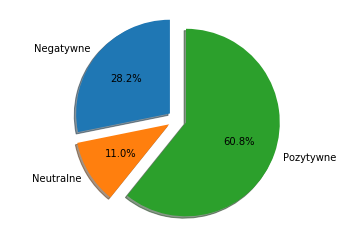

In [12]:
labels =["Negatywne","Neutralne","Pozytywne"]

explode = (0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(df1.iloc[0:3,1], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Widać sporą dysproporcję opinii, duzo wiecej jest pozytywnych niz innych, w szczegolnosci najwiecej jest tych z ocena 5. Oczywiscie neuralnych jest najmniej, ale to ma zwiazek z tym, że opinia jest neutralna, gdy dostala score=3, podczas gdy inne maja po dwie wartosci.

## Który rok /miesiąc ma najwiecej opinii


In [13]:
df["review/month"]=df["review/date"].apply(lambda x: x.split("-")[1])
df["review/year"]=df["review/date"].apply(lambda x: x.split("-")[0])
df.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/date,review/opinion,review/month,review/year
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1,1233360000,Don't buy!,"First of all, the company took my money and s...",2009-01-31 00:00:00,Negatywna,01,2009
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...,2007-10-04 00:00:00,Pozytywna,10,2007
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4,1186704000,good,works real good....a little hard to set up......,2007-08-10 00:00:00,Pozytywna,08,2007
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4,1146182400,No instructions included...,The price was right for this cable ($11.95+$4...,2006-04-28 00:00:00,Pozytywna,04,2006
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB c...,2007-03-12 00:00:00,Negatywna,03,2007


In [14]:
df4=df.groupby("review/year").count()
df4

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/date,review/opinion,review/month
review/year,,,,,,,,,,,,,
1999,4,4,4,4,4,4,4,4,4,4,4,4,4
2000,242,242,242,242,242,242,242,242,242,242,242,242,242
2001,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
2002,739,739,739,739,739,739,739,739,739,739,739,739,739
2003,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448
2004,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057
2005,6502,6502,6502,6502,6502,6502,6502,6502,6502,6502,6502,6502,6502
2006,9987,9987,9987,9987,9987,9987,9987,9987,9987,9987,9987,9987,9987
2007,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193


Mozna zauwazyc, że większość opini pochodzi z lat 2005-2009 (Być może kryzys z 2008 może mieć wpływ na opinie)

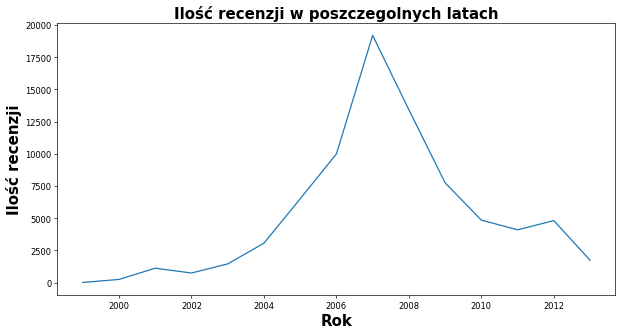

In [15]:
plt.figure(figsize=(12,6),dpi=60)
plt.plot(range(1999,2014),df4["product/productId"])
plt.xlabel('Rok',fontdict={"fontweight":"bold","fontsize":18})
plt.ylabel('Ilość recenzji',fontdict={"fontweight":"bold","fontsize":18})
plt.title('Ilość recenzji w poszczegolnych latach',fontdict={"fontweight":"bold","fontsize":18})
plt.show()

In [16]:
df5=df.groupby("review/month").count()
df5

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/date,review/opinion,review/year
review/month,,,,,,,,,,,,,
01,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715
02,7196,7196,7196,7196,7196,7196,7196,7196,7196,7196,7196,7196,7196
03,6894,6894,6894,6894,6894,6894,6894,6894,6894,6894,6894,6894,6894
04,5423,5423,5423,5423,5423,5423,5423,5423,5423,5423,5423,5423,5423
05,6189,6189,6189,6189,6189,6189,6189,6189,6189,6189,6189,6189,6189
06,5697,5697,5697,5697,5697,5697,5697,5697,5697,5697,5697,5697,5697
07,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380
08,6708,6708,6708,6708,6708,6708,6708,6708,6708,6708,6708,6708,6708
09,5966,5966,5966,5966,5966,5966,5966,5966,5966,5966,5966,5966,5966


Opinie podzielone na poszszegolne miesiące są rozlożone głównie na miesiące zimowe. Zatem wtedy możemy postarać sie o reklamę produktów

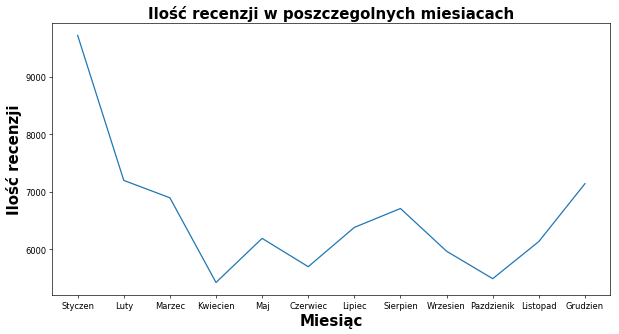

In [17]:
months=["Styczen","Luty","Marzec","Kwiecien","Maj","Czerwiec","Lipiec","Sierpien","Wrzesien","Pazdzienik","Listopad","Grudzien"]
plt.figure(figsize=(12,6),dpi=60)
plt.plot(months,df5["product/productId"])
plt.xlabel('Miesiąc',fontdict={"fontweight":"bold","fontsize":18})
plt.ylabel('Ilość recenzji',fontdict={"fontweight":"bold","fontsize":18})
plt.title('Ilość recenzji w poszczegolnych miesiacach',fontdict={"fontweight":"bold","fontsize":18})
plt.show()

## Ceny produtków a opinie


In [18]:
df2=df[df["product/price"] != " unknown"] #tworzymy nową tabelę ze znanymi cenami produktów
df2=df2.drop_duplicates('product/productId', inplace=False) # usuwamy duplikaty produktów, interesują nas ceny
df2['product/price']=df2['product/price'].astype('float64')
df2.describe()

,product/price,review/score,review/time
count,2855.000000,2855.000000,2.855000e+03
mean,15.271555,3.430473,1.232054e+09
std,33.386855,1.622368,7.897759e+07
min,0.010000,1.000000,9.509184e+08
25%,3.990000,2.000000,1.178669e+09
50%,7.550000,4.000000,1.217203e+09
75%,14.975000,5.000000,1.299110e+09
max,569.950000,5.000000,1.362096e+09


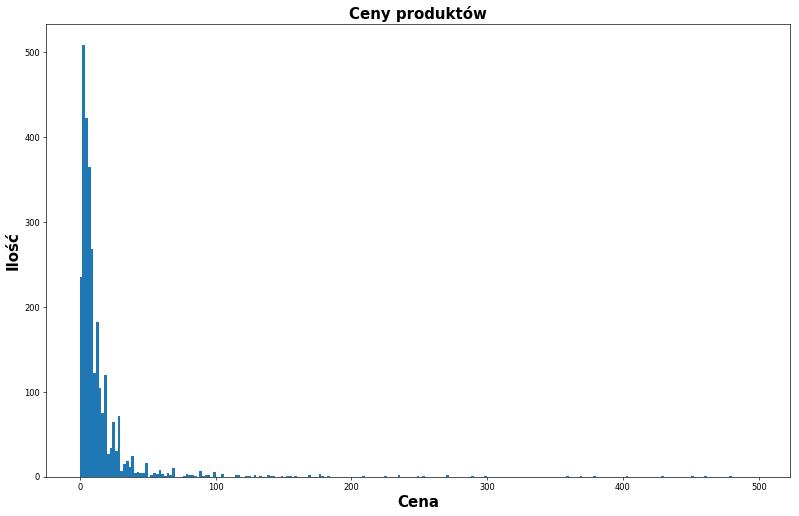

In [19]:
plt.figure(figsize=(16,10),dpi=60)
plt.hist(df2['product/price'],bins=range(0,500,2))
plt.xlabel('Cena',fontdict={"fontweight":"bold","fontsize":18})
plt.ylabel('Ilość',fontdict={"fontweight":"bold","fontsize":18})
plt.title('Ceny produktów',fontdict={"fontweight":"bold","fontsize":18})
plt.show()

Mozna zauważyć, że najwiecej produtków ma cenę stosunkowo niską, co może mieć wpływ na opinie pozytywne (czyli, że niska cena wpływa na niezbyt wygórowane oczekiwania klienta).

In [20]:
ceny1=df2.loc[df2["product/price"]<=5].count()[0] #ceny produtków mniejsze niz 5$
ceny2=df2.loc[(df2["product/price"]<=10)&(df2["product/price"]>5)].count()[0] #ceny produtków mniejsze niz 5$ i wieksze niz 2$
ceny3=df2.loc[(df2["product/price"]<=20)&(df2["product/price"]>10)].count()[0] #ceny produtków mniejsze niz 15$ i wieksze niz 5$
ceny4=df2.loc[(df2["product/price"]<=50)&(df2["product/price"]>20)].count()[0] #ceny produtków mniejsze niz 80$ i wieksze niz 15$
ceny5=df2.loc[df2["product/price"]>=50].count()[0] #ceny produtków wieksze niz 80$

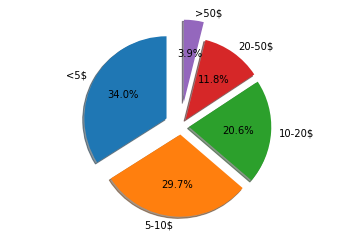

In [21]:
labels =["<5$","5-10$","10-20$","20-50$",">50$"]

explode = (0.2, 0.1, 0.1,0.1,0.3) 

fig1, ax1 = plt.subplots()
ax1.pie([ceny1,ceny2,ceny3,ceny4,ceny5], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Jak widac prawie 2/3 produtków ma cenę do 10$

## Produkty, które można polecać innym użytkownikom, aby zwiększyć szanse na sprzedaż

Można polecić produkty, które mają największą wartość review/score, przy wysokiej liczbie komentarzy, ponieważ są one dobrze oceniane przez innych użytkowników oraz popularne. Dodatkowo mozna okreslic jaka srednio ocene dostaje kazdy z produktow, aby polecać produkty z najlepsza srednia oceną.


In [22]:
# Grupujemy produkty pod względem sredniej wartosci review/score
df3=df.groupby(["product/title"]).mean().sort_values(by='review/score', ascending=False)
df3.head(10)

,review/score,review/time
product/title,,
"BoxWave ProFormance Samsung GALAXY Note Lightweight Case - Ultra Low Profile, Slim Fit Snap Shell Cover - Samsung GALAXY Note Cases and Covers (Lemon Yellow)",5.0,1.359850e+09
Panavise 797-14 14-Inch UniFlex Mount,5.0,1.171411e+09
BoxWave Cingular Nokia E62 ClearTouch Anti-Glare Screen Protector (Single Pack),5.0,1.265587e+09
Kingston flash memory card - 512 MB - MMCmobile ( MMCM/512 ),5.0,1.157933e+09
Kingman Spyder Battery Charger Wall Charger,5.0,1.251158e+09
Panasonic Versio Silver Flip Face Plate,5.0,1.168560e+09
Naztech Bravo Universal PDA Cell Phone Case #5 - Truly Black,5.0,1.215648e+09
LG TRAVEL CHARGER LX-560,5.0,1.314835e+09
Naztech Cabrio Case - Small and Medium Flip Phones - Kyocera / Samsung / LG / Motorola / Nokia - Black,5.0,1.176941e+09


Jest to mało efektywne, poniewaz nie wiemy ile recencji ma dany produkt, mozemy sie nad tym zastanowic ponieżej uwzgledniajac srednia review/score

In [23]:
df3["review/count"]=df.groupby(["product/title"]).count().iloc[:,0]
df3.sort_values("review/count",ascending=False)

,review/score,review/time,review/count
product/title,,,
Plantronics Voyager 510 Bluetooth Headset [Retail Packaging],4.161778,1.207581e+09,3443
"Motorola HS850 Bluetooth Headset (Color Sent Based on Availability. Comes in Black, Blue and Grey, or Silver)[Bulk Packaged]",3.350610,1.182013e+09,984
Samsung WEP200 Bluetooth Wireless Phones Headset - Retail Packaging - Black,3.811321,1.214701e+09,848
Motorola H700 Bluetooth Headset [Motorola Retail Packaging],3.525478,1.178097e+09,628
Jawbone Noise Shield Bluetooth Headset (Black) [Retail Packaged],3.197432,1.218404e+09,623
"Motorola MOTOROKR S9 Bluetooth Active Headphones (Red,Black) [Retail Packaging]",2.973118,1.228145e+09,558
,3.824497,1.081195e+09,547
Coby CA-747 Dual Position CD/MD/MP3 Cassette Adapter,3.433712,1.263204e+09,528
BlueAnt Supertooth Light Bluetooth Speakerphone (Black),4.058252,1.227306e+09,515



Można zatem polecic produkty, które mają wysoką średnią ocen i jednocześnie maja wysoką liczbę opinii, czyli są popularne


In [24]:
df4=df3.loc[(df3["review/score"]>4) & (df3["review/count"]>100)] #Wybieramy recencje ze srednia powyzej 4 i liczba recencji powyzej 100
df4

,review/score,review/time,review/count
product/title,,,
Multi-Use Vehicle Charger with Dual USB Ports and Dual 12 Volt Sockets - Magnadyne,4.613793,1.304989e+09,145
PalmOne m100 series Faceplate Cover (Blue Mist),4.559322,1.007109e+09,236
"Palm Horizontal Case for Treo 650, 700",4.403670,1.202440e+09,109
Motorola Cigarette Lighter Adapter for Motorola Phones,4.380814,1.200284e+09,344
"BoxWave Galaxy Note 2 / Note DuoSuit - Slim-Fit Ultra Durable TPU Case with Stylish ""S"" Design on Back - Choose Your Device and Color",4.343066,1.341428e+09,411
Nokia OEM Car Charger For Nokia E62,4.309735,1.267007e+09,113
"BoxWave Samsung Galaxy Note 2 UniColor Case - Sleek Dual Tone TPU Case for Durable Anti-Slip Protection, Transparent Matte Back with Solid Border - Samsung Galaxy Note 2 Cases and Covers",4.304348,1.337498e+09,138
BlueAnt Bluetooth Portable Handsfree Supertooth II Handsfree Speakerphone,4.250000,1.191935e+09,184
Sony Ericsson USB Cable,4.250000,1.257299e+09,124


Produkty powyżej możemy polecac

## Określenie, na jakie kategorie można podzielić komentarze użytkowników

Za pomocą kolumny review/helpfulness można określić przydatność poszczególnych komentarzy użytkowników

In [25]:
poz=df["review/helpfulness"].apply(lambda x: x.split("/")[0]).values.astype(int)
all=df["review/helpfulness"].apply(lambda x: x.split("/")[1]).values.astype(int)
df['review/help'] = np.where(all > 0,poz/all,0)
df.head()

C:\Users\Jarek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/date,review/opinion,review/month,review/year,review/help
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1,1233360000,Don't buy!,"First of all, the company took my money and s...",2009-01-31 00:00:00,Negatywna,01,2009,0.0
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...,2007-10-04 00:00:00,Pozytywna,10,2007,0.0
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4,1186704000,good,works real good....a little hard to set up......,2007-08-10 00:00:00,Pozytywna,08,2007,0.0
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4,1146182400,No instructions included...,The price was right for this cable ($11.95+$4...,2006-04-28 00:00:00,Pozytywna,04,2006,0.8
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB c...,2007-03-12 00:00:00,Negatywna,03,2007,0.0


Komentarze możemy podzielic na przydatne, mało przydatne, nieprzydatne oraz nieokreślone(czyli te bez helpfulness)

In [26]:
przydatne=df[df['review/help']>=0.9].count()[0] #recencja jest przydatna gdy stosunek plusow do wszystkich ocen recenzji wynosi ponad 90%
średnio_przydatne=df[ (df['review/help']<0.9) & (df['review/help']>=0.65) ].count()[0] #recenzja jest średnio przydatna gdy stosunek plusow do wszystkich ocen recenzji wynosi ponad 65% i mniej niz 90%
mało_przydatne=df[ (df['review/help']<0.65) & (df['review/help']>=0.4) ].count()[0] #recenzja jest mało przydatna gdy stosunek plusow do wszystkich ocen recenzji wynosi ponad 40% i mniej niz 65%
nieprzydatne=df[(df['review/help']<0.4)&(df["review/helpfulness"].apply(lambda x: x.split("/")[0]).values.astype(int)!=0)].count()[0] #recencja jest nieprzydatna gdy stosunek plusow do wszystkich ocen recenzji wynosimniej niz 40%
nieokreślone=df[df["review/helpfulness"].apply(lambda x: x.split("/")[0]).values.astype(int)==0].count()[0] #recenzja jest nieokreslona gdy mamy 0 ocen recenzji


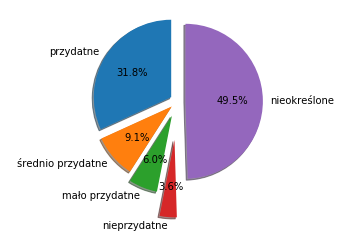

In [27]:
labels =["przydatne","średnio przydatne", "mało przydatne", "nieprzydatne","nieokreślone"]

explode = (0.1, 0.1,0.2, 0.5,0.1) 

fig1, ax1 = plt.subplots()
ax1.pie([przydatne,średnio_przydatne,mało_przydatne,nieprzydatne,nieokreślone], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Widać, że spora liczba komentarzy jest nieokreślona, czyli nie da się powiedzieć nic o jego przydatności. Jednoczesnie widać, że wiekszosc komentarzy okreslonych jest oceniania jako przydatne

## Ilość słów w poszczególnych opiniach

In [28]:
df["review/text"][6] #przykladowa recenzja

" I have a Sony Ericsson K700i, which doesn't sell in the US, but after I received the USB Data Cable I have some troubles installing it but soon after those we're resolved I worked great, I'm very pleased with my purchase and would highly recommend this product and any other from MyNetDeals (electro_island), it's really a very big save from buying direct from Sony Ericsson. Thanks!."

In [29]:
# "review/length" kolumna pokazuje dlugosc recenzji
le=[]
for i in range(0,len(df["review/text"])):
    le.append(len(df["review/text"][i].split()))
df["review/length"]=le
df.head()
    

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/date,review/opinion,review/month,review/year,review/help,review/length
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1,1233360000,Don't buy!,"First of all, the company took my money and s...",2009-01-31 00:00:00,Negatywna,01,2009,0.0,140
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...,2007-10-04 00:00:00,Pozytywna,10,2007,0.0,30
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4,1186704000,good,works real good....a little hard to set up......,2007-08-10 00:00:00,Pozytywna,08,2007,0.0,24
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4,1146182400,No instructions included...,The price was right for this cable ($11.95+$4...,2006-04-28 00:00:00,Pozytywna,04,2006,0.8,109
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB c...,2007-03-12 00:00:00,Negatywna,03,2007,0.0,15


In [30]:
positive=df.loc[df["review/opinion"]=="Pozytywna"]
negative=df.loc[df["review/opinion"]=="Negatywna"]
neutral=df.loc[df["review/opinion"]=="Neutralna"]

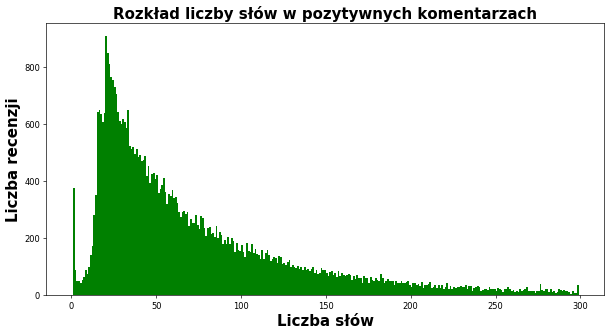

In [31]:
plt.figure(figsize=(12,6),dpi=60)
plt.hist(positive["review/length"],bins=range(300), color="green")
plt.title("Rozkład liczby słów w pozytywnych komentarzach",fontdict={"fontweight":"bold","fontsize":18})
plt.xlabel("Liczba słów",fontdict={"fontweight":"bold","fontsize":18})
plt.ylabel("Liczba recenzji",fontdict={"fontweight":"bold","fontsize":18})
plt.show()

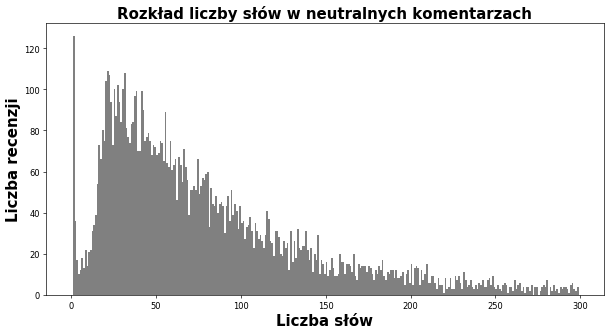

In [32]:
plt.figure(figsize=(12,6),dpi=60)
plt.hist(neutral["review/length"],bins=range(300), color="grey")
plt.title("Rozkład liczby słów w neutralnych komentarzach",fontdict={"fontweight":"bold","fontsize":18})
plt.xlabel("Liczba słów",fontdict={"fontweight":"bold","fontsize":18})
plt.ylabel("Liczba recenzji",fontdict={"fontweight":"bold","fontsize":18})
plt.show()

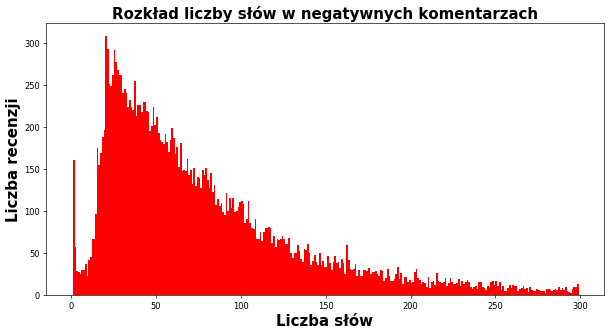

In [33]:
plt.figure(figsize=(12,6),dpi=60)
plt.hist(negative["review/length"],bins=range(300), color="red")
plt.title("Rozkład liczby słów w negatywnych komentarzach",fontdict={"fontweight":"bold","fontsize":18})
plt.xlabel("Liczba słów",fontdict={"fontweight":"bold","fontsize":18})
plt.ylabel("Liczba recenzji",fontdict={"fontweight":"bold","fontsize":18})
plt.show()

In [34]:
print("Średnia ilość słów w pozytywnych komentarzach:",positive["review/length"].mean())
print("Średnia ilość słów w neutralnych komentarzach:",neutral["review/length"].mean())
print("Średnia ilość słów w negatywnych komentarzach:",negative["review/length"].mean())

Średnia ilość słów w pozytywnych komentarzach: 82.81944965603502
Średnia ilość słów w neutralnych komentarzach: 92.2282371831632
Średnia ilość słów w negatywnych komentarzach: 85.86812643316398


## Które słowa występowały najczęściej w komentarzach

In [35]:
# Potrzebujemy zapisac wszystkie slowa w jednej liscie, najpierw lista zawieracjaca wszystkie recenzje
reviews_poz = [word.lower().split() for word in positive["review/text"]] #funkcja lower zastosowana do zmiany wielkich liter na małe
reviews_poz[:3]

[['great',
  'product-',
  'tried',
  'others',
  'and',
  'this',
  'is',
  'a',
  'ten',
  'compared',
  'to',
  'them.',
  'real',
  'easy',
  'to',
  'use',
  'and',
  "sync's",
  'easily.',
  'definite',
  'recommended',
  'buy',
  'to',
  'transfer',
  'data',
  'to',
  'and',
  'from',
  'your',
  'cell.'],
 ['works',
  'real',
  'good....a',
  'little',
  'hard',
  'to',
  'set',
  'up...web',
  'part',
  'doesnt',
  'work',
  'thru',
  'handset',
  'manager',
  'as',
  'advertised.....have',
  'to',
  'go',
  'into',
  'networking',
  'and',
  'turn',
  'it',
  'on'],
 ['the',
  'price',
  'was',
  'right',
  'for',
  'this',
  'cable',
  '($11.95+$4.94',
  's&h;)',
  'compared',
  'with',
  'sony',
  'ericssons',
  'offering',
  '($25+).',
  'there',
  'are',
  'a',
  'few',
  'different',
  'prices',
  'on',
  'amazon',
  'through',
  'the',
  'same',
  'company,',
  'mynetdeals.com,',
  'so',
  'make',
  'sure',
  'you',
  'get',
  'the',
  '$11.95',
  'one.so',
  'i',
  'p

In [36]:
# funkcja chain pozwoli zapisac liste list jako liste :)
from collections import Counter
from itertools import chain
all_words_poz=list(chain(*reviews_poz))
Counter(all_words_poz).most_common(15)

[('the', 214398),
 ('i', 128539),
 ('and', 111907),
 ('a', 102398),
 ('to', 100438),
 ('it', 89010),
 ('is', 78683),
 ('this', 57583),
 ('my', 53334),
 ('for', 51896),
 ('of', 47768),
 ('with', 44185),
 ('phone', 41995),
 ('that', 39203),
 ('in', 38611)]

In [37]:
# Nie chcemu aby w naszych rozważaniach pojawialy sie slowa typu /stopwords/ 'the','in','and',itd.
# Pakiet nltk oferuje liste najczesciej uzywanych slow, wykorzystamy go
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [38]:
reviews_poz_nsw = [[word for word in review_words if not word in stop_words] # warunek zeby słowo nie bylo z listy stopwords
              for review_words in reviews_poz]

In [39]:
reviews_poz_nsw[0]

['great',
 'product-',
 'tried',
 'others',
 'ten',
 'compared',
 'them.',
 'real',
 'easy',
 'use',
 "sync's",
 'easily.',
 'definite',
 'recommended',
 'buy',
 'transfer',
 'data',
 'cell.']

In [40]:
all_words_poz_nsw=list(chain(*reviews_poz_nsw))
Counter(all_words_poz_nsw).most_common(15)

[('phone', 41995),
 ('one', 16565),
 ('great', 14595),
 ('use', 13330),
 ('like', 12881),
 ('good', 12868),
 ('works', 11128),
 ('get', 10659),
 ('battery', 10551),
 ('would', 10539),
 ('headset', 10372),
 ('phone.', 8317),
 ('bluetooth', 8060),
 ('it.', 7774),
 ("i've", 7695)]

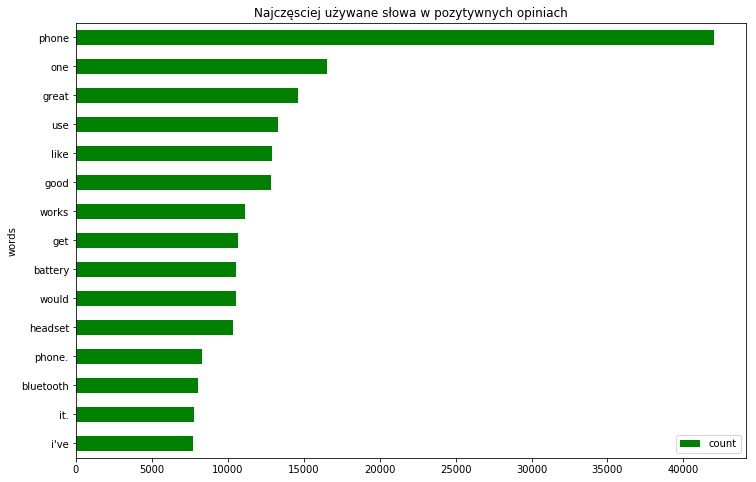

In [41]:
clean_reviews_poz_nsw = pd.DataFrame(Counter(all_words_poz_nsw).most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(12, 8))

clean_reviews_poz_nsw.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green")
ax.set_title("Najczęsciej używane słowa w pozytywnych opiniach")
plt.show()

Teraz zrobimy to samo dla komentarzy neutralnych i negatywnych

In [42]:
reviews_neu = [word.lower().split() for word in neutral["review/text"]] #funkcja lower zastosowana do zmiany wielkich liter na małe

all_words_neu=list(chain(*reviews_neu))

In [43]:
reviews_neu_nsw = [[word for word in review_words if not word in stop_words] # warunek zeby slwoo nie bylo z listy stopwords
              for review_words in reviews_neu]

In [44]:
all_words_neu_nsw=list(chain(*reviews_neu_nsw))
Counter(all_words_neu_nsw).most_common(15)

[('phone', 8722),
 ('one', 3072),
 ('would', 2632),
 ('like', 2599),
 ('good', 2556),
 ('get', 2474),
 ('use', 2352),
 ('headset', 2197),
 ('battery', 1847),
 ('phone.', 1657),
 ('sound', 1624),
 ('case', 1569),
 ('ear', 1539),
 ('works', 1490),
 ('really', 1436)]

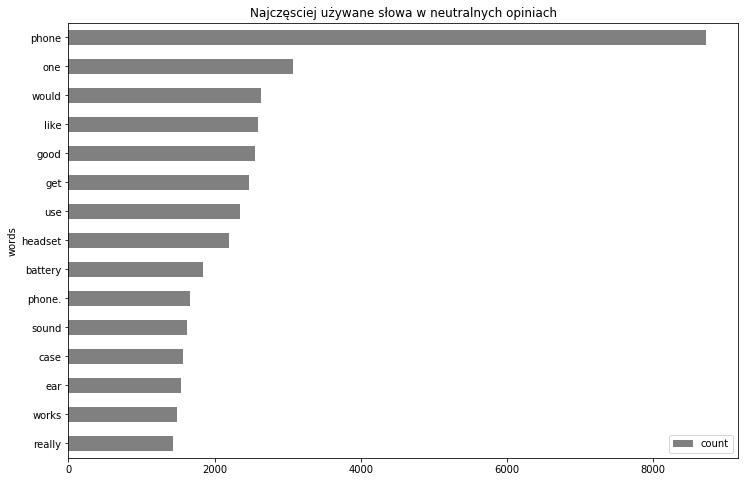

In [45]:
clean_reviews_neu_nsw = pd.DataFrame(Counter(all_words_neu_nsw).most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(12, 8))

clean_reviews_neu_nsw.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="grey")
ax.set_title("Najczęsciej używane słowa w neutralnych opiniach")
plt.show()

In [46]:
reviews_neg = [word.lower().split() for word in negative["review/text"]] #funkcja lower zastosowana do zmiany wielkich liter na małe

all_words_neg=list(chain(*reviews_neg))

In [47]:
reviews_neg_nsw = [[word for word in review_words if not word in stop_words] # warunek zeby slwoo nie bylo z listy stopwords
              for review_words in reviews_neg]

In [48]:
all_words_neg_nsw=list(chain(*reviews_neg_nsw))
Counter(all_words_neg_nsw).most_common(15)

[('phone', 21956),
 ('one', 7797),
 ('would', 7282),
 ('get', 6911),
 ('battery', 5035),
 ('use', 4615),
 ('even', 4597),
 ('like', 4470),
 ('headset', 4129),
 ('phone.', 4090),
 ('bought', 3983),
 ('product', 3933),
 ('work', 3847),
 ('it.', 3745),
 ('got', 3618)]

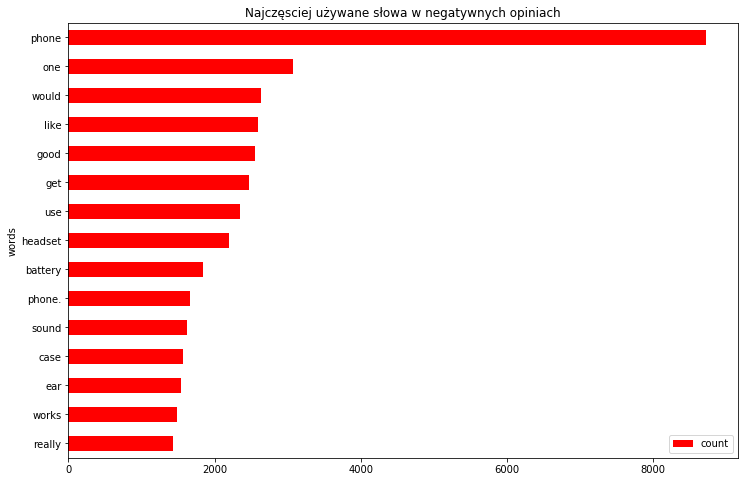

In [49]:
clean_reviews_neg_nsw = pd.DataFrame(Counter(all_words_neg_nsw).most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(12, 8))

clean_reviews_neu_nsw.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="red")
ax.set_title("Najczęsciej używane słowa w negatywnych opiniach")
plt.show()

### Klasyfikatory


In [50]:
# biblioteka sklearn i funckja do podzialu zbiorów na treningowy i testowy
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df["review/text"], df["review/opinion"], test_size=0.20, random_state=42)


In [53]:
# Teraz chcemy zapisac recenzje zlozona ze slow za pomoca wektora o dlugosci wszystkich uzytych slow w recenzjach i jedynkach
# w miejscu slow uzytych w konkretnej recenzji
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors=vectorizer.fit_transform(X_train)
X_test_vectors=vectorizer.transform(X_test)

In [54]:
print("recenzja:", X_train[1], "\n Zapis w postaci wektora \n:", X_train_vectors[1]) 
#przykladowa recencja nr1 ma dwa razy uzyte slowo z miejsca 47033 itd.

recenzja:  Great product- tried others and this is a ten compared to them. Real easy to use and sync's easily. Definite recommended buy to transfer data to and from your Cell. 
 Zapis w postaci wektora 
:   (0, 47033)	2
  (0, 28546)	1
  (0, 41546)	3
  (0, 41643)	1
  (0, 41816)	1
  (0, 4143)	1
  (0, 21381)	1
  (0, 29932)	1
  (0, 30953)	2
  (0, 4706)	1
  (0, 25316)	1
  (0, 46308)	1
  (0, 17111)	1
  (0, 43140)	1
  (0, 22919)	2
  (0, 16126)	1
  (0, 20541)	1
  (0, 34077)	1
  (0, 22353)	1
  (0, 5927)	1
  (0, 29797)	1
  (0, 32463)	1
  (0, 32570)	1
  (0, 17943)	1
  (0, 20438)	1


#### Regresja logistyczna

In [57]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [58]:
clf.fit(X_train_vectors, y_train)

C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
X_test.head()

32315     I just purchased my second Plantronics Voyage...
41875     I am so disgusted with T-Mobile. We moved to ...
65080     I've been very happy with this cover, fits ov...
54782     I just had to have this faceplate! Donald Duc...
33030     The voice quality from my headset to the othe...
Name: review/text, dtype: object

In [80]:
print("Opinia:", clf.predict(X_test_vectors[123]))

Opinia: ['Pozytywna']


In [81]:
predictions = clf.predict(X_test_vectors)

In [82]:
score = clf.score(X_test_vectors, y_test)
print(score)
#niestety, ale jest to dosc slaby wynik,wyzej uzyty solver lbfgs warto sprobowac innych "solverów"

0.7844292410997086


LIBLINEAR – A Library for Large Linear Classification
SAG- Minimizing Finite Sums with the Stochastic Average Gradient
SAGA- A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

In [87]:
# Nasz zbior danych jest dosc duzy, wiec mozna zrezygnowac z liblinear
clf2 = LogisticRegression(solver="newton-cg")
clf3= LogisticRegression(solver="sag")
clf4= LogisticRegression(solver="saga")

In [88]:
clf2.fit(X_train_vectors, y_train)

C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
score2 = clf2.score(X_test_vectors, y_test)
print(score2)

0.7844292410997086


In [90]:
clf3.fit(X_train_vectors, y_train)

C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
score3 = clf3.score(X_test_vectors, y_test)
print(score3)

0.7824654757379957


In [92]:
clf4.fit(X_train_vectors, y_train)

C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Jarek\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
score4 = clf4.score(X_test_vectors, y_test)
print(score4)

0.7791080704421639


Widać, że nie ma znaczących róznic pomiędzy wynikami